#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.***

# <u>**Classification Problems**</u>:

- Classification problems are, in which the outcome variable or response variable (Y) takes discrete values. Primary objective of a classification model is to predict the probability of an observation belonging to a class, known as class probability.

- Classification problems may have binary or multiple outcomes or classes. Binary outcomes are called  *binary classification* and multiple outcomes are called *multinomial classification*. There are several  techniques used for solving classification problems such as logistic regression, classification trees, discriminant analysis, neural networks, and support vector machines.


# <u>**Binary Logistic Regression**</u>:

- Logistic regression is a statistical model in which the response variable takes a discrete value and the  explanatory variables can either be continuous or discrete. If the outcome variable takes only two values,  then the model is called **binary logistic regression model**. 
- Assume that the *outcomes are called positive (usually coded as Y = 1) and negative (usually coded as Y = 0)*. Then the probability that a record belongs  to a positive class, $P(Y = 1)$, using the binary logistic regression model is given by 

$$P(Y=1) = \frac{e^Z}{1+e^Z}$$
where
$$Z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_mX_m$$
Here $X_1, X_2, \cdots, X_m$ are the independent variables or features.
- The logistic regression has an S-shaped  curve(thus also known as Sigmoid function), and gives the class probability of an observation belonging to class labelled as 1, that is,  P(Y = 1). 

Taking log on the above Eq.

$$ln \left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = Z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_mX_m$$

The left-hand side of above Eq. is a **log natural of odds** and is known as *logit function*; the right-had side  is a *linear function*. 

***Taking the log of the odds ratio brings about a certain symmetricity in the results, making it easier to interpret and use in various statistics.*** 
- https://www.geeksforgeeks.org/log-odds/
- https://www.geeksforgeeks.org/role-of-log-odds-in-logistic-regression/#:~:text=Log%20odds%20play%20an%20important,makes%20interpreting%20the%20output%20easier.
- https://towardsdatascience.com/logit-of-logistic-regression-understanding-the-fundamentals-f384152a33d1
- https://towardsdatascience.com/https-towardsdatascience-com-what-and-why-of-log-odds-64ba988bf704


Such models are called **generalized linear models (GLM)**. In GLM, the errors may  not follow normal distribution and there exists a transformation function of the outcome variable that  takes a linear functional form. 

### **Credit Classification using the German credit rating dataset.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

**Metadata for German Credit Card dataset**

![credit_card_metadata_1](credit_card_metadata_1.png)
![credit_card_metadata_2](credit_card_metadata_2.png)

In [3]:
credit_df = pd.read_csv(os.getcwd()+"/data/German Credit Data.csv")
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### ***Encoding Categorical Features***
- There are several categorical features in the data which need to be binary encoded (using dummy variables),  also known as **one hot encoding (OHE).**

- ***If the feature has n categories, then either n or (n – 1) dummy variables can be  created [the model will have only (n – 1) dummy variables].***

In [6]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True)

In [7]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [8]:
credit_df.checkin_acc.unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [8]:
encoded_credit_df[['checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14']].head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


For example, "checkin_acc" variable is encoded into the following three dummy variables and the base  category.<br>
checkin_acc_A11 is dropped.<br>
If all the following three variables’ values are set to 0, it indicates the  account type is checkin_acc_A11. 

### ***Building the Model***

In [9]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### ***Splitting Dataset into Training and Test Sets***

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### ***Building Logistic Regression Model***

In [11]:
# Logit() method for logistic Regression
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [12]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2022-08-09 10:50  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### ***Model Diagnostics***

To validate the logistic regression model to ensure its validity and goodness of fit before it can  be used for practical applications. The following measures are used to validate a logistic regression model: 

1. **Wald’s test (a Chi-square test):**  ***for checking the statistical significance of individual predictor  (feature) variables.*** This is equivalent to t-test in the MLR (Multiple Linear Regression) model.  

2. ***Likelihood ratio test for checking the statistical significance of the overall model*** (LLR p-value is  reported in the output). Likelihood ratio test is also used for variable (feature) selection.  

3. **Pseudo $R^2$**: ***It is a measure of goodness of the model.*** It is called pseudo $R^2$ because it does not  have the same interpretation of $R^2$ as in the MLR model. 

*The model summary suggests that as per Wald’s test, only 8 features are statistically significant at a significant value of $\alpha = 0.05$, as p-values are less than 0.05. p-value for likelihood ratio test (almost 0.00)  indicates that the overall model is statistically significant.* 

In [13]:
# pd.DataFrame(logit_model.pvalues)

In [14]:
def get_significant_vars(lm):
    """
    method get_significant_vars() that takes the model object as an input and returns the list  of significant variables after filtering out the variable with corresponding p-value less than 0.05.
    """
    
    # Store the p-values and corresponding columns names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    # Filter the columns names with p-value <= 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [15]:
significant_vars = get_significant_vars(logit_model)
significant_vars
# Only these features have come out to be significant.

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

### ***Buliding a Logistic Regg. Model using only significant variables***

In [16]:
final_logit = sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2022-08-09 10:50 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

#### **Interpretation of Coeffs. in Logisstic Regg.**

- ***The negative sign in coefficient value indicates that as the value of this variable increases, the probability  of being a bad credit decreases, i.e. $P(Y_i = 1)$ decreases.<br> A positive sign means that the probability of  being a bad credit increases as the corresponding value of the variable increases.***

- **In binary LR, the regression parameter i.e the coeffs. captures the change in the log ratio of odds for unit change in the independent (feature) variable value.**

- **That is, β1 is the change in the log-natural of the ratio of odds. Alternatively, exp(β1) is the change in the odds ratio for unit change in the feature value.**

From above conclusions we can say:  
1. The log of odds ratio or probability of being a bad credit increases as "duration", amount", "inst_rate"  increases.<br>For example, one unit change in duration results in 0.019723 unit change in log of  odds ratio. 

2. The probability of being a bad credit decreases as age increases. This means that older people  tend to pay back their credits ontime compared to younger people. 

### ***Predicting on test data***

In [18]:
y_pred_df = pd.DataFrame({"actual": y_test,
                         "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


**To understand how many observations the model has classified correctly and how many it has not, a  cut-off probability needs to be assumed. Assume that the cut-off probability is 0.5; then all observations  with predicted probability of more than 0.5 will be predicted as bad credits and rest all as good credits.** 

P(Y = 0) = Good Credit<br>
P(Y = 1) = Bad Credit

In [20]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


- The 'actual' column in the DataFrame depicts the actual label of the credit in the test set, while  'predicted' column depicts what the model has predicted by taking 0.5 as cut-off probability value.

- It can be noticed from actual and predicted columns that some classifications are correct and some are  wrong. For better understanding of this confusion, we can build a confusion matrix.

- ***Confusion matrix (also known as error matrix or classification table) is a matrix formed by checking  the actual values and predicted values of observations in the dataset.***

In [21]:
# !pip install -U seaborn
sns.__version__

'0.11.2'

In [22]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True, fmt = ".2f")
    # xticklables = ["Bad Credit", "Good Credit"], yticklables = ["Bad Credit", "Good Credit"]
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


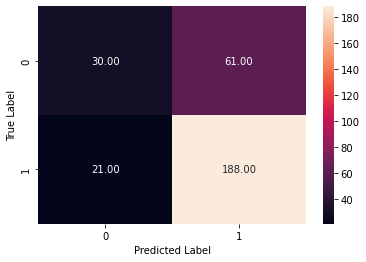

In [23]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

![Confusion-Matrix](confusion_matrix.png)

- **In the confusion matrix, the columns represent the predicted label (class), while the rows  represent the actual label (class).**<br> For example, out of 91 (i.e., 30 + 61) bad credits, only 30 have been classified correctly as bad credits and rest 61 have been classified as good credits when the cut-off  probability is 0.5.  

- **Each row represents the actual bad credit and good credit observations present in the test dataset  and each column represents predicted values of outcome variable.** 
- We can note the following:  
    1. Left-top quadrant represents actual bad credit and is correctly classified as bad credit.<br> This is  called **True Positives (TP).**  
    2. Left-down quadrant represents actual good credit and is incorrectly classified as bad credit.<br> This  is called **False Positives (FP).**  
    3. Right-top quadrant represents actual bad credit and is incorrectly classified as good credit.<br> This  is called **False Negatives (FN).**  
    4. Right-down quadrant represents actual good credit and is correctly classified as good credit.<br> This is called **True Negatives (TN).** 

- Type 1 and Type 2 Error<br>
    These two type error comes when the model does not predict all the data point accurately and some of the points are misclassified that leads to some error.
     * Type 1 error: This error occurs when the actual value is “0” but it predicted “1”. In statistics term, this error tells the level of significance (α) i.e. alpha. The value of alpha is chosen by us so, the error depends on what value we choose.
     * Type 2 error: This error occurs when the actual value is “1” but it is predicted “0”. In statistics term, this error named is beta and it is mainly dependent on the sample size(n) and variance(σ).

### ***Measuring Accuracies***
- In classification, the model performance is often measured using concepts such as sensitivity, specificity, precision, and F-score. 
- ***The ability of the model to correctly classify positives and negatives is called sensitivity (also known as recall or true positive rate) and specificity (also known as true negative rate), respectively.***

- ***Sensitivity/Recall(True Positive Rate)***: 
    Sensitivity is the conditional probability that the predicted class is positive given that the actual class is  positive.<br>
    $$\text{Sensitivity} = \frac{TP}{TP + FN}$$
<br> 


- ***Specificity(True Negative Rate)***: 
    Specificity is the conditional probability that the predicted class is negative given that the actual class is  negative.<br>
    $$\text{Specificity} = \frac{TN}{TN + FP}$$
<br>    


- ***Precision***: 
    Precision is the conditional probability that the actual value is positive given that the prediction by the  model is positive.<br>
    $$\text{Presion} = \frac{TP}{TP + FP}$$
<br>    
 
 
- ***F-Score***: 
    F-Score is a measure that combines precision and recall (harmonic mean between precision and recall). <br>
    $$\text{F-Score} = \frac{2 * Recall * Precision}{Recall + Precision}$$
<br>    
    
classification_report() method in skearn.metrics gives a detailed report of precision, recall, and F-score  for each class.

In [24]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

# Here, Support is the number of actual occurrences of the class in the specified dataset

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



The model is very good at identifying the good credits (Y = 0), but not very good at identifying bad  credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right  cut-off probability. 

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


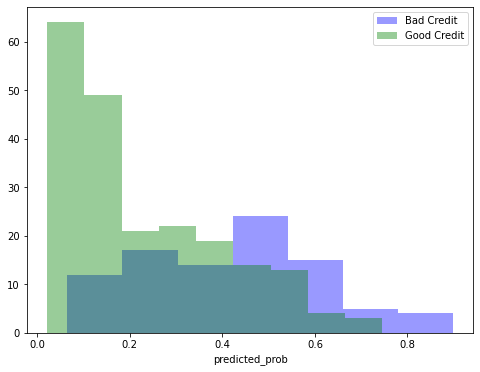

In [25]:
plt.figure(figsize = (8,6))  
#Plotting distribution of predicted probability values for bad credits  
sns.distplot(y_pred_df[y_pred_df.actual == 1]["predicted_prob"],  kde=False, color = 'b',  label = 'Bad Credit') 

#Plotting distribution of predicted probability values for good credits  
sns.distplot(y_pred_df[y_pred_df.actual == 0]["predicted_prob"],  kde=False, color = 'g',  label = 'Good Credit')  

plt.legend() 
plt.show();

We can use a chart to understand how the distributions of predicted probabilities for bad credit and  good credit look like.<br> 
**Larger the overlap between predicted probabilities for different classes,  higher will be the misclassifications.** 

### ***Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)***

- **Receiver operating characteristic (ROC) curve can be used to understand the overall performance  (worth) of a logistic regression model (and, in general, of classification models) and used for model selection.**

- **Given a random pair  of positive and negative class records, ROC gives the proportions of such pairs that will be correctly  classified.**

- ***ROC curve is a plot between sensitivity (true positive rate) on the vertical axis and 1 – specificity  (false positive rate) on the horizontal axis.*** 

The method draw_roc() which takes the actual  classes and predicted probability values and then draws the ROC curve.<br>
metrics.roc_curve() returns different threshold (cut-off) values and their corresponding false positive and true positive rates. Then these values can be taken and plotted to create the ROC curve.metrics.roc_auc_score() returns the area under the curve (AUC). 

In [26]:
def draw_roc(actual, probs):
    
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(8,6))
    
    # Plot of fpr & tpr values for diff. threshold values
    plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % auc_score)
    # Draw a diagonal line connecting the origin & yop right most point 
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
    plt.ylabel('True Positive Rate')  
    plt.legend(loc='lower right')  
    plt.show()
    
    return fpr, tpr, thresholds

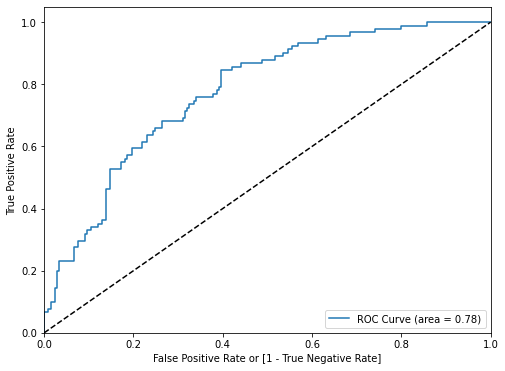

In [27]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

* The diagonal line represents the case of not using a model (no discrimination between  positive and negative); the area below the diagonal line is equal to 0.5.

* Sensitivity and/or specificity are likely to change when the cut-off probability is changed. The  line above the diagonal line captures how sensitivity and (1 – specificity) change when  the cut-off probability is changed. 

* **Model with higher AUC is preferred and AUC is frequently used for  model selection.** 

- **As a thumb rule, AUC of at least 0.7 is required for practical application of the model. AUC greater than 0.9 implies an outstanding model.** 

- Caution should be exercised while selecting models based on AUC, especially  when the data is imbalanced (i.e., dataset which has less than 10% positives). In case of imbalanced datasets,  the AUC may be very high (greater than 0.9); however, either sensitivity or specificity values may be poor.<br>For this example, the AUC is 0.78, which implies the model is fairly good.



In [28]:
auc_score = metrics.roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)
np.round(auc_score, 2)

0.78

### ***Finding Optimal Classification Cut-off***

- ***The overall accuracy, sensitivity, and specificity will  depend on the chosen cut-off probability$(P_c)$.***

- The following two methods are used for selecting the cut-off  probability:
     1. Youden’s index  
     2. Cost-based approach 

### ***Youden's Index***

Sensitivity and specificity change when we change the cut-off probability.<br> 
Youden’s index is a classification cut-off probability for which the following function is maximized (also known  as J-statistic): 

$$\text{Youden's Index} = \text{J-Statistic} = {Max}_{p}[Sensitivity(p) + Specificity(p) - 1]$$

**Sensitivity** is also known as **True Positive Rate (TPR)** and **specificity** is known as  **True Negative Rate (TNR)**. That is, select the cut-off probability for which **(TPR + TNR – 1) is maximum.** 


- draw_roc() has returned **tpr** and **fpr** values, which we have stored in variables tpr, fpr, respectively.  The variable **thresholds** captures the corresponding cut-off probabilities.
- We can take difference of tpr  and fpr and then sort the values in descending order. The thresholds value, for which the above Eq. is maximum, ***should be the optimal cut-off.*** 

In [29]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr,
                       'thresholds': thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

tpr_fpr.sort_values(by = 'diff', ascending=False)[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


**From the above result, the optimal cut-off is 0.22. We can now classify all the observations beyond 0.22  predicted probability as bad credits and others as good credits.**

In [30]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.22 else 0)

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


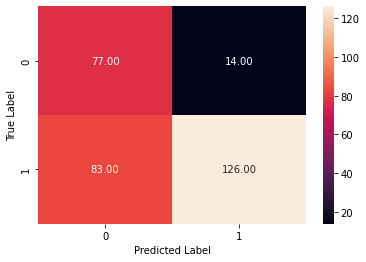

In [31]:
draw_cm(y_pred_df.actual, y_pred_df.predicted_new)

In [32]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



**With cut-off probability of 0.22, the model is able to classify the bad credits better and the F1-score for  bad credits (Y = 1) has also improved to 0.61.**

### ***Cost-Based Approach***
- As the cost of false negatives and false positives is not same, the optimal classification cut-off probability  can also be determined using cost-based approach, which finds the cut-off where the total cost is minimum.

- In the cost-based approach, we assign penalty cost for misclassification of positives and negatives and find the total cost for a cut-off probability.
- Assuming cost of a false positive is C1 and that of a false negative is C2, total cost will be  $$\text{Total cost = FN × C1 + FP × C2}$$  
- **The optimal cut-off probability is the one which minimizes the total penalty cost.** 


We will write a method  get_total_cost() to return the penalty cost for a specific cut-off probability. The method also takes the  relative cost of false negatives and false positives. The function will take actual and predicted values, find  the number of false positives (FPs) and false negatives (FNs), and return the total cost. 

In [33]:
def get_total_cost(actual, predicted, cost_FPs, cost_FNs):
    # Get confusion matrix and calculate cost
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    cm_mat = np.array(cm)
    return cm_mat[0,1]*cost_FNs + cm_mat[1,0]*cost_FPs

In [34]:
cost_df = pd.DataFrame(columns=['prob', 'cost'])

**Let us assume that false negatives (predicting a bad credit to be a good credit) are five times costlier  than false positives (predicting a good credit to be a bad credit).**<br> 
Deciding the costs will require domain  knowledge.


We can calculate the penalty cost for each cut-off probability values between 0.1 and 0.5 with incremental values of 0.01 and sort the costs in ascending order to find the cut-off probability at which the  penalty cost is minimum. 

In [35]:
idx = 0

# Iterate cut-off probability values b/w 0.1 and 0.5
for each_prob in range(10,50):
    cost = get_total_cost(y_pred_df.actual, y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: 

In [36]:
cost_df.sort_values(by = 'cost')[0:5]

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


**The lowest cost is achieved at cut-off probability of 0.14 if false negatives are assumed to be five times  costlier than false positives. So, let us predict everything beyond 0.14 as bad credit and below 0.14 as  good credit.**

In [37]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.14 else 0)

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


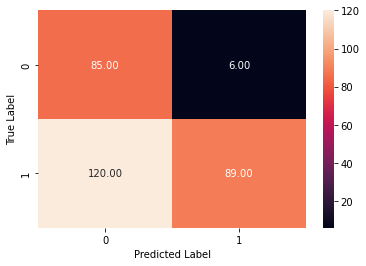

In [38]:
draw_cm(y_pred_df.actual, y_pred_df.predicted_using_cost)

**As shown above, the model has reduced the false negatives to only 6. This is because of high cost  false negatives (5 times) compared to false positives. The number of false positives have increased to 120.**

***

## **Gain Chart & Lift Chart**

Gain chart and lift chart are two measures that are used for measuring the benefits of using the logistic  regression model (in general, analytical model) and are used in business contexts such as target marketing. In target marketing or marketing campaigns, customers’ responses to campaign are usually very  low (in many cases the customers who respond to marketing campaigns are less than 1%). Another  example of such low conversion is response to advertisement on the Internet (such as Google Adwords and mobile advertisements). The organization incurs cost for each customer contact and hence would  like to minimize the cost of marketing campaign and at the same time achieve the desired response level  from the customers. 

The gain and lift charts are obtained using the following steps:  
1. Predict the probability Y = 1 (positive) using the logistic regression (LR) model and arrange the  observation in the decreasing order of predicted probability [i.e., P(Y = 1)].  
2. Divide the datasets into deciles. Calculate the number of positives (Y = 1) in each decile and  cumulative number of positives up to a decile.  
3. Gain chart is a chart drawn between gain on the  vertical axis and decile on the horizontal axis.  
4. Lift  chart is the chart between lift on the vertical axis and the corresponding decile on the horizontal axis. 

$$Gain = \frac{\text{Cumulative number of the positive observations up to a decile}}{\text{Total  number of positive observations in the data}}$$

$$\text{Lift} = \frac{\text{Cumulative number of positive observations up to decile i using the LR model}}{\text{Cumulative number of positive observations up to decile i based on random model}}$$

### ***Loading & Prepping the DataSet***

Using bank data: The data describes a problem in which a bank  is interested in predicting which customers may respond to their direct marketing campaign to open a  term deposit with the bank. The response variable Y = 1 implies that the customer opens a term deposit  after the campaign and Y = 0 otherwise. The marketing campaign is based on the phone calls. 


![bank_metadata](bank_metadata.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [39]:
bank_df = pd.read_csv(os.getcwd()+"/Data/bank.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [40]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [41]:
bank_df['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [42]:
X_features = list(bank_df.columns)
X_features.remove("subscribed")
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [43]:
encoded_bank_df = pd.get_dummies(bank_df[X_features], drop_first=True)

In [44]:
# The outcome variable subscribed is set to yes or no. This needs to be encoded as 1 (yes) and 0 (no). 

Y = bank_df.subscribed.map(lambda x: int(x == 'yes'))
X = encoded_bank_df

***Here the dataset is not split into training and test datasets for simplicity as our objective is primarily to  understand gain and lift chart.***

In [8]:
import statsmodels.api as sm

In [45]:
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2022-08-09 10:50 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [47]:
def get_significant_vars(lm):
    """
    method get_significant_vars() that takes the model object as an input and returns the list  of significant variables after filtering out the variable with corresponding p-value less than 0.05.
    """
    
    # Store the p-values and corresponding columns names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    # Filter the columns names with p-value <= 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [48]:
# getting th esignificant variables
significant_vars = get_significant_vars(logit_model)
significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [49]:
X_features = ['current-campaign','previous-campaign','job_retired','marital_married','education_tertiary','housing-loan_yes','personal-loan_yes']

In [50]:
logit_model2 = sm.Logit(Y, sm.add_constant(X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
logit_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   subscribed       AIC:              3065.2182 
Date:                 2022-08-09 10:51 BIC:              3116.5501 
No. Observations:     4521             Log-Likelihood:   -1524.6   
Df Model:             7                LL-Null:          -1615.5   
Df Residuals:         4513             LLR p-value:      8.1892e-36
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

In [52]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'predicted_prob': logit_model2.predict(sm.add_constant(X[X_features]))})

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
# sort the observations by their predicted probabilities in the descending order. 

sorted_predict_df = y_pred_df[['predicted_prob','actual']].sort_values(by='predicted_prob', ascending=False)

In [54]:
# After sorting, we will segment all the observations into deciles. First we will find the number of observations in each decile by dividing the total number of observations by 10. 

num_per_decile = int(len(sorted_predict_df)/10)  
print('Number of observations per decile:', num_per_decile) 

Number of observations per decile: 452


The function get_deciles() takes a DataFrame and segments the observations into deciles and marks each  observation with the decile number it belongs to. The DataFrame with sorted probabilities should be  passed to this function. 

In [55]:
def get_deciles(df):
    # Set first decile
    df['decile'] = 1
    
    idx = 0
    # Iterate through all 10 deciles
    for each_d in range(0,10):
        # Setting each 452 obs. to one decile in sequence
        df.iloc[idx: idx + num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    
    df['decile'] = df['decile'] + 1
    return df

In [56]:
deciles_predict_df = get_deciles(sorted_predict_df)

In [57]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


**Calculating Gain**

To calculate the gain, we need to find how many subscriptions (how many 1’s) are available in each  decile. For this, the actual column value can be summed for each decile. 

In [58]:
gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()

gain_lift_df.columns = ['decile', 'gain']

And then the cumulative sum for each subsequent decile divided by the total number of 1’s available will  give the gain percentage. 

In [59]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [60]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


So, if we target only the first 50% of the customers, we have almost 70% subscriptions. The change in gain  percentage can be plotted for better understanding

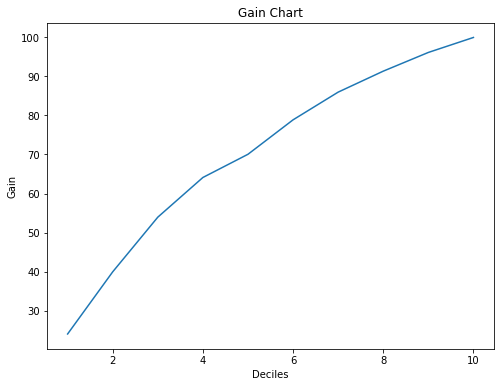

In [61]:
plt.figure(figsize=(8,6))
plt.plot(gain_lift_df['decile'], gain_lift_df['gain_percentage'], '-')
plt.title('Gain Chart')
plt.xlabel("Deciles")
plt.ylabel("Gain")
plt.show();

**Calculating Lift**

Lift can be calculated by dividing gain percentage by decile number.

In [62]:
gain_lift_df['lift'] = gain_lift_df.gain_percentage/(gain_lift_df.decile * 10)

gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


As per the lift values, targeting customers using the model can capture 2.39 times  the number of subscribers compared to a random model in decile 1, 1.99 times up to decile 2, and so  on and so forth. 

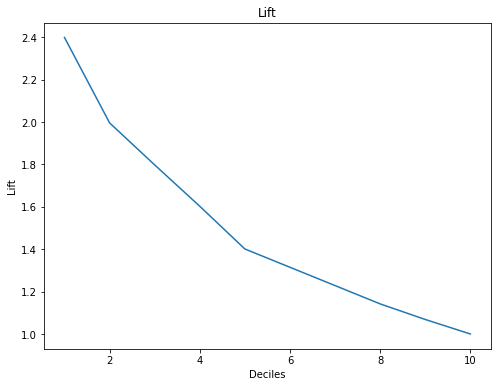

In [63]:
plt.figure(figsize=(8,6))
plt.plot(gain_lift_df['decile'], gain_lift_df['lift'], '-')
plt.title('Lift')
plt.xlabel("Deciles")
plt.ylabel("Lift")
plt.show();

## ***Classification Tree(Decision Tree Learning)***

**Decision Tree Learning or Classification Trees** are a collection of divide and conquer problem-solving  strategies that use tree-like (inverted tree in which the root is at the top) structure to predict the value  of an outcome variable. 
The tree starts with the root node consisting of the complete data and thereafter uses intelligent strategies to split the nodes (parent node) into multiple branches (thus, creating children  nodes). The original data is divided into subsets in this process. This is done to create more homogenous  groups at the children nodes. It is one of the most powerful predictive analytics techniques used for generating business rules.

- Classification and Regression Tree (CART) is one of the classification tree techniques. **CART is an  umbrella term; we will call it a <u>classification tree</u> if the outcome variable value is discrete and a <u>regression  tree</u> if the outcome variable value is continuous.**  

- **Classification tree uses various impurity measures such as the Gini Impurity Index and Entropy to  split the nodes. Regression tree, on the other hand, splits the node that minimizes the Sum of Squared  Errors (SSE).** 

*The following steps are used to generate classification and regression trees:*

1. Start with the complete training data in the root node. 

2. Decide on the measure of impurity, that is, either Gini Impurity Index or Entropy. Search for a  predictor variable that minimizes the impurity when the parent node is split into children nodes. This happens when the original data is divided into two subsets using a predictor variable such  that it results in the maximum reduction in the impurity in the case of a discrete dependent variable or maximum reduction in SSE in the case of a continuous dependent variable. 

3. Repeat step 2 for each subset of the data (for each internal node) using the independent variables until  
    - All the dependent variables are exhausted.  
    - The stopping criteria are met. Few stopping criteria used are number of levels of tree from  the root node, minimum number of observations in parent/child node (e.g., 10% of the  training data), and minimum reduction in impurity index.
    
4. Generate business rules for the leaf (terminal) nodes of the tree.

sklearn.tree.DecisionTreeClassifier provides decision tree algorithm to create the decision tree.<br> 
It takes the  following key parameters:  
1. criterion: string – The function to measure the quality of a split. Supported criteria are “gini” for  the Gini impurity and “entropy” for the information gain. Default is gini.  
2. max_depth: int – The maximum depth of the tree.  
3. min_samples_split: int or float – The minimum number of samples required to split an internal  node. If int, then number of samples or if float, percentage of total number of samples. Default is 2.  
4. in_samples_leaf: int or float – The minimum number of samples required to be at a leaf node. 

### **Spliting the DataSet**

In [9]:
X = encoded_credit_df
Y = credit_df.status

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### **Building Decision Tree Classifier using Gini Criteria**

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion= 'gini', max_depth=3)

In [12]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### **Measuring Test Accuracy**

In [13]:
from sklearn import metrics

tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.5835743204164258

### **Displaying the Tree**

In [14]:
# !pip install graphviz

In [15]:
# !pip install pydotplus

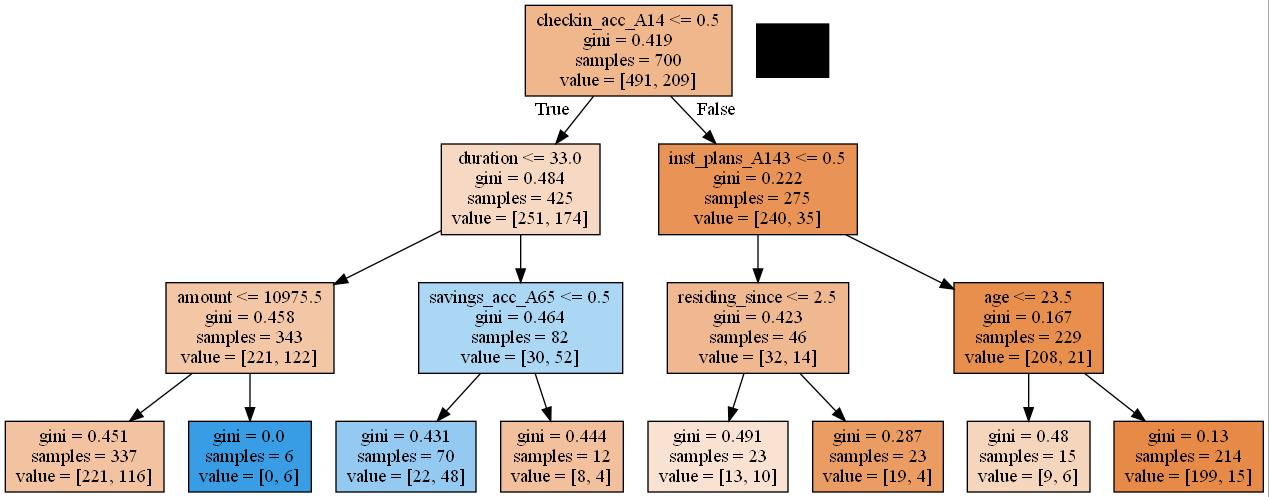

In [22]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export tree into odt file
export_graphviz(clf_tree, out_file = 'chd_tree.odt', feature_names= X_train.columns, filled=True)

# Read & Create Image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')

# Render the png file
Image(filename = 'chd_tree.png')

From the decision tree diagram above, it can be interpreted that:  
1. At the top node, there are 700 observations of which 491 are good credits and 209 are bad credits. The corresponding Gini index is 0.419. Later in the section, the Gini impurity index is explained.  

2. checkin_account_A14 is the most important feature for splitting good and bad credits in the dataset when compared to other features and hence, chosen as the top splitting criteria.  

3. The first rule (checkin_account_A14 < 0.5) means if the customer has checkin_account_A14 account or not.  

4. This rule has split the dataset into two subsets represented by the second level nodes. On the left  node, there are 425 samples (i.e., not having checkin_account_A14) and on the right node, there  are 275 samples (i.e. having checkin_account_A14).  

5. The nodes represented by dark shades depict good credits, while the nodes represented by light  shades are bad credits.  

6. One of the rules can be interpreted as: If the customer does not have checkin_account_A14 and credit duration is less than 33 and does not have saving_acc_A65, then there is high probability  of being a bad credit. There are 70 records in the dataset that satisfy these conditions and 48 of  them have bad credit.  

7. Another rule: If the customer has checkin_account_A14 and Inst_plans_A143 and age is more  than 23.5, then there is a high probability of being good credit. 

### **Understanding Gini Impurity**
Gini measurement is the probability of a random sample being classified correctly if we randomly pick  a label according to the distribution in a branch. Gini impurity can be computed by summing the probability pi of an item with label i being chosen times the probability $1 − p_i$ of a mistake in categorizing  that item over all classes. It reaches its minimum (zero) when all cases in the node belong to a specific  category.<br> The Gini impurity index for a classification problem with C classes is given by 
$$Gini(k) = \sum_{i=1}^{C}p_i(k)(1-p_i(k))$$

So, in the top node the probability of finding good credit is 491/700 and finding bad credit is 209/700. Gini Impurity for the top node in the above decision tree will be

In [23]:
gini_node_1 = 1 - pow(491/700, 2) - pow(209/ 700, 2)
print(round(gini_node_1, 4))

0.4189


### **Building Decision Tree Using Entropy Criteria**

Entropy is another popular measure of impurity that is used in classification trees to split a node.

Assume there are $J$ classes labelled 1,2,...,J. The entropy at node k is given by
$$Entropy(k) = -\sum_{j=1}^{J}p(j|k)log_{2}(j|k)$$

***Entropy lies b/w 0 and 1, Higher Entropy means Higher Impurity***

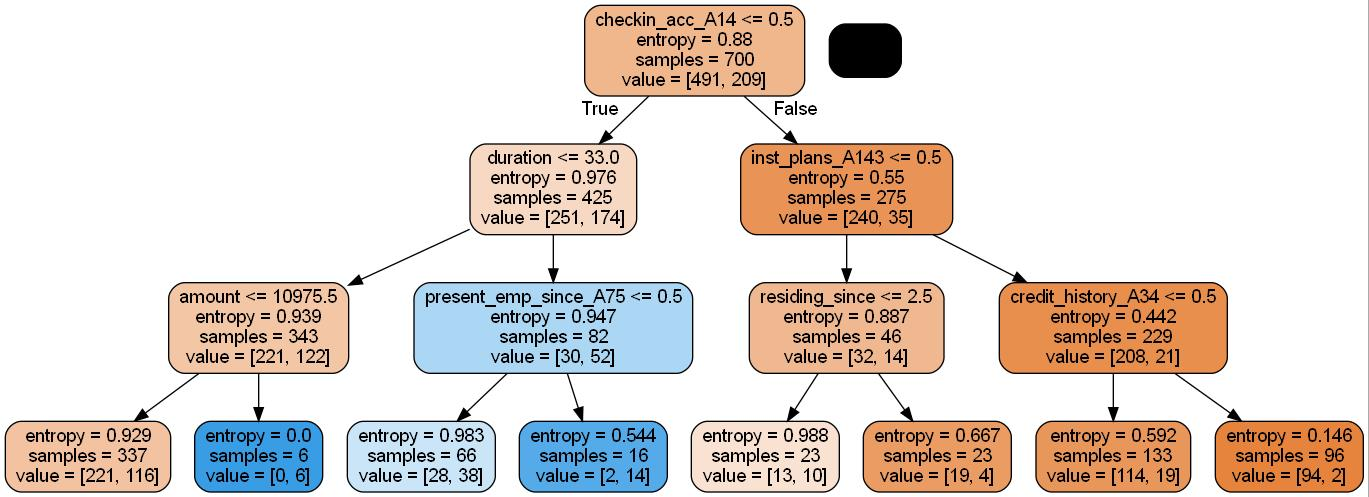

In [27]:
clf_tree_entropy = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
clf_tree_entropy.fit(X_train, y_train)

# Export the tree into odt file
export_graphviz(clf_tree_entropy, out_file='chd_tree_entropy.odt', feature_names=X_train.columns, filled = True, rounded=True)

# read & Create the Image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt')
chd_tree_graph.write_jpg('chd_tree_entropy.png')

# Render the png file
Image(filename='chd_tree_entropy.png')

From the decision tree diagram above, it can be interpreted that:  
1. The nodes represented by dark shades depict majority good credits, while the nodes represented  by light shades are majority bad credits.  

2. The rules generated at the top two level nodes are same as rules generated by decision tree built  using Gini index. The rules at the third level nodes are different.  

3. One of the rules can be interpreted as: If the customer has *checkin_account_A14, Inst_plans code* is A143 and credit history code is A34, then there is a high probability of being good credit.  There are 96 customers who satisfy these criteria and 94 of them have good credit. 


### **Calculating Entropy**

In [28]:
# At the top node, there are 700 observations of which 491 are good credits and 209 are bad credits. So entropy at this node is given by the above formula

import math

entropy_node_1 = - (491/700)*math.log2(491/700) - (209/700)*math.log2(209/700)
print(round(entropy_node_1, 3))

0.88


### **Measuring Test Accuracy using AUC**

In [29]:
tree_predict = clf_tree_entropy.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.5763972869236027

### **Finding Optimal Criteria and Max Depth**

We need to search through various combinations of criteria and tree depths to find optimal criteria and  depth where the tree gives highest accuracy.<br>  
*sklearn.model_selection* provides a feature called *GridSearchCV* which searches through a set of possible hyperparameter values and reports the most optimal one.<br> 
GridSearchCV needs to be provided with  the accuracy measure to be used for searching for the optimal value. For classification models, roc_auc  values are mostly used. It uses k-fold cross validation to measure and validate the accuracy.  GridSearchCV can be used for any machine learning model and can search through multiple hyperparameters of the model. 
It takes the following arguments:  
1. estimator – A scikit-learn model which implements the estimator interface.  
2. param_grid – A dictionary with parameter names (string) as keys and lists of parameter settings  to try as values.  
3. scoring – Is a string; is the accuracy measure, i.e. roc_auc.  
4. cv – Is an integer; gives the number of folds in k-fold.

Configuring the grid search to search for optimal parameters  
   - Splitting criteria: gini or entropy.  
   - Maximum depth of decision tree ranging from 2 to 10. 
   
The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal  parameter will be chosen based on ROC AUC score. 


In [34]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [35]:
clf.best_score_

0.6830090864917396

In [36]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

The tree with *gini* criteria and *max_depth = 4* is the best model. Thus we can build the model based on this criteria

In [48]:
clf_tree_new = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf_tree_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [49]:
tree_predict = clf_tree_new.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

0.5713497029286503

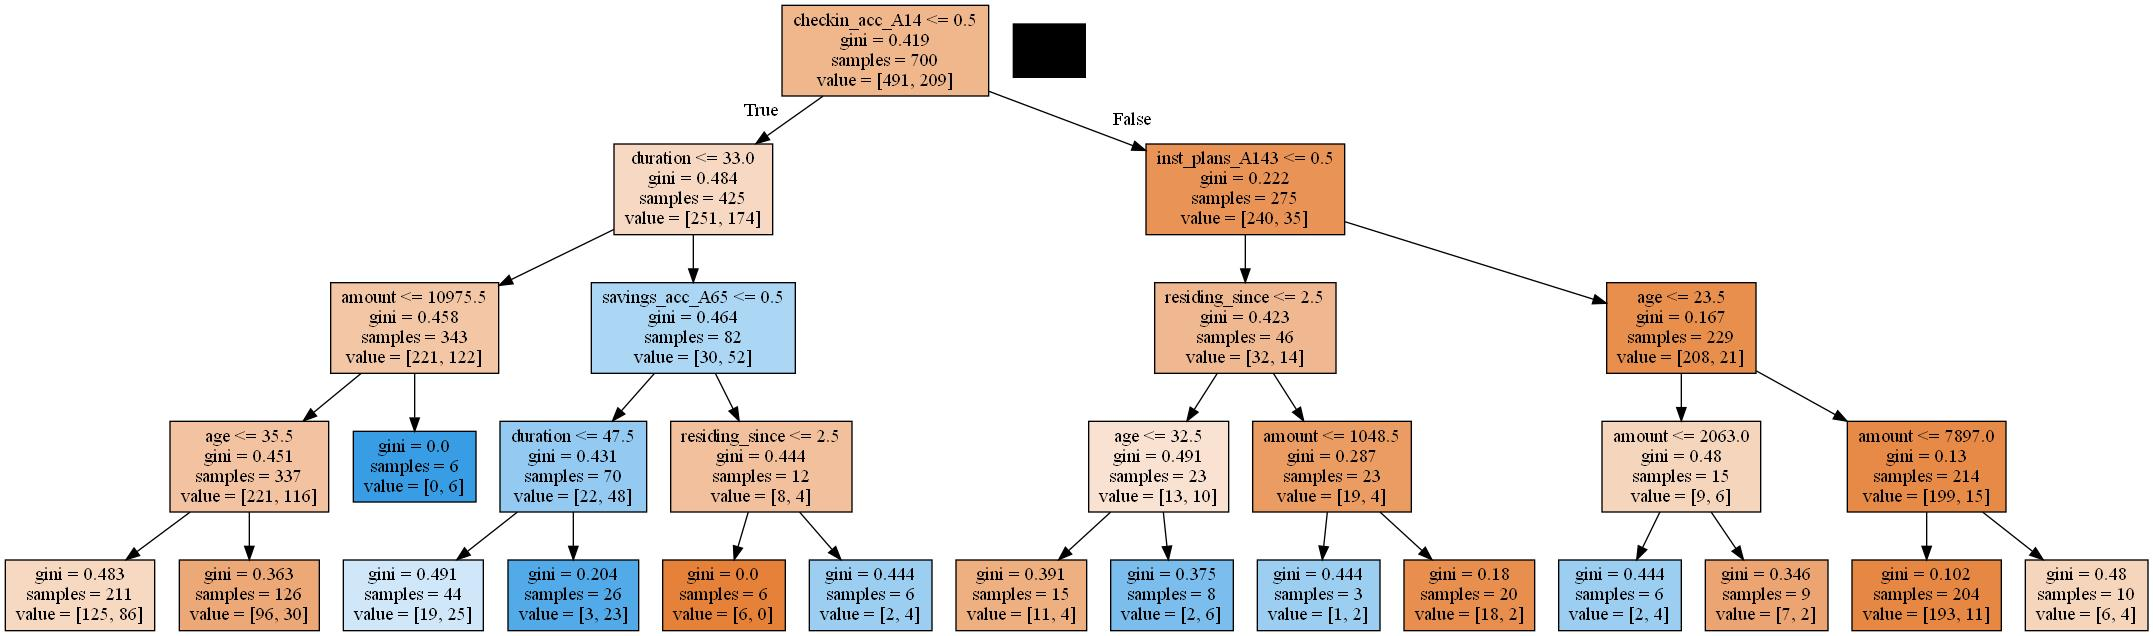

In [50]:
# Export tree into odt file
export_graphviz(clf_tree_new, out_file = 'chd_tree_4.odt', feature_names= X_train.columns, filled=True)

# Read & Create Image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_4.odt')
chd_tree_graph.write_jpg('chd_tree_4.png')

# Render the png file
Image(filename = 'chd_tree_4.png')

#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.***